          T           P        vf           vfg          vg           uf  \
0     0.010    0.006102  0.001000  2.065326e+02  206.533627     0.000000   
1     4.000    0.008116  0.001000  1.575305e+02  157.531546    16.770141   
2     5.000    0.008704  0.001000  1.473998e+02  147.400772    20.974982   
3     6.000    0.009331  0.001000  1.379966e+02  137.997612    25.179712   
4     8.000    0.010704  0.001000  1.211489e+02  121.149900    33.587684   
..      ...         ...       ...           ...         ...          ...   
69  370.000  210.174778  0.002217  2.746754e-03    0.004964  1844.870691   
70  371.000  212.710748  0.002285  2.425813e-03    0.004711  1863.649757   
71  372.000  215.280450  0.002376  2.047036e-03    0.004424  1886.671146   
72  373.000  217.886235  0.002520  1.546784e-03    0.004066  1918.677969   
73  374.136  220.890000  0.003256  1.824467e-09    0.003256  2044.659183   

            ufg           ug           hf          hfg           hg        sf  \
0   23

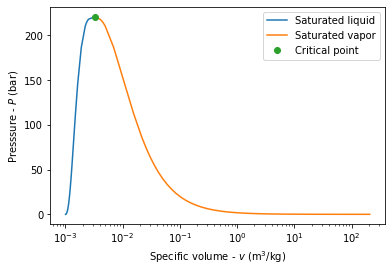

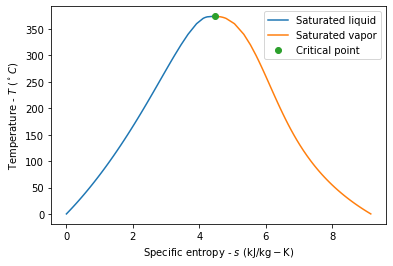

In [1]:
"""
This example generates a saturated steam table and plots the vapor dome. The
steam table corresponds to data typically found in thermodynamic text books
and uses the same customary units.

Requires: Cantera >= 2.5.0, matplotlib >= 2.0, pandas >= 1.1.0, numpy >= 1.12
"""

import cantera as ct
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

w = ct.Water()

# create colums
columns = ['T', 'P',
           'vf', 'vfg', 'vg',
           'uf', 'ufg', 'ug',
           'hf', 'hfg', 'hg',
           'sf', 'sfg', 'sg']

# temperatures correspond to Engineering Thermodynamics, Moran et al. (9th ed),
# Table A-2; additional data points are added close to the critical point;
# w.min_temp is equal to the triple point temperature
degc = np.hstack([np.array([w.min_temp - 273.15, 4, 5, 6, 8]),
                  np.arange(10, 37), np.array([38]),
                  np.arange(40, 100, 5), np.arange(100, 300, 10),
                  np.arange(300, 380, 20), np.arange(370, 374),
                  np.array([w.critical_temperature - 273.15])])

df = pd.DataFrame(0, index=np.arange(len(degc)), columns=columns)
df.T = degc

arr = ct.SolutionArray(w, len(degc))

# saturated vapor data
arr.TQ = degc + 273.15, 1
df.P = arr.P_sat / 1.e5
df.vg = arr.v
df.ug = arr.int_energy_mass / 1.e3
df.hg = arr.enthalpy_mass / 1.e3
df.sg = arr.entropy_mass / 1.e3

# saturated liquid data
arr.TQ = degc + 273.15, 0
df.vf = arr.v
df.uf = arr.int_energy_mass / 1.e3
df.hf = arr.enthalpy_mass / 1.e3
df.sf = arr.entropy_mass / 1.e3

# delta values
df.vfg = df.vg - df.vf
df.ufg = df.ug - df.uf
df.hfg = df.hg - df.hf
df.sfg = df.sg - df.sf

# reference state (triple point; liquid state)
w.TQ = w.min_temp, 0
uf0 = w.int_energy_mass / 1.e3
hf0 = w.enthalpy_mass / 1.e3
sf0 = w.entropy_mass / 1.e3
pv0 = w.P * w.v / 1.e3

# change reference state
df.ug -= uf0
df.uf -= uf0
df.hg -= hf0 - pv0
df.hf -= hf0 - pv0
df.sg -= sf0
df.sf -= sf0

# print and write saturated steam table to csv file
print(df)
df.to_csv('saturated_steam_T.csv', index=False)

# illustrate the vapor dome in a P-v diagram
plt.semilogx(df.vf.values, df.P.values, label='Saturated liquid')
plt.semilogx(df.vg.values, df.P.values, label='Saturated vapor')
plt.semilogx(df.vg.values[-1], df.P.values[-1], 'o', label='Critical point')
plt.xlabel(r'Specific volume - $v$ ($\mathrm{m^3/kg}$)')
plt.ylabel(r'Presssure - $P$ (bar)')
plt.legend()

# illustrate the vapor dome in a T-s diagram
plt.figure()
plt.plot(df.sf.values, df['T'].values, label='Saturated liquid')
plt.plot(df.sg.values, df['T'].values, label='Saturated vapor')
plt.plot(df.sg.values[-1], df['T'].values[-1], 'o', label='Critical point')
plt.xlabel(r'Specific entropy - $s$ ($\mathrm{kJ/kg-K}$)')
plt.ylabel(r'Temperature - $T$ (${}^\circ C$)')
plt.legend()

plt.show()

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df.describe(include='all')

,T,P,vf,vfg,vg,uf,ufg,ug,hf,hfg,hg,sf,sfg,sg
count,74.000000,74.000000,74.000000,7.400000e+01,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,7.400000e+01,74.000000
mean,115.839811,27.890147,0.001187,3.189313e+01,31.894314,521.521979,1926.156628,2447.678607,527.179363,2072.771617,2599.950980,1.374830,6.121827e+00,7.496657
std,119.324123,60.861966,0.000409,4.458572e+01,44.585584,574.719157,594.089108,109.252491,586.880170,610.849738,138.179540,1.302719,2.634953e+00,1.335253
min,0.010000,0.006102,0.001000,1.824467e-09,0.003256,0.000000,0.000267,2044.659450,0.000610,0.000308,2116.579294,0.000000,4.752398e-07,4.456453
25%,23.250000,0.028478,0.001003,1.336416e-01,0.134794,97.543739,1754.524630,2399.146751,97.546594,1950.347915,2533.040740,0.342721,4.144625e+00,6.451726
50%,57.500000,0.178133,0.001016,8.636245e+00,8.637261,240.639612,2212.727121,2424.048195,240.657711,2364.581156,2566.188497,0.799474,7.151860e+00,7.951333
75%,197.500000,14.775557,0.001153,4.800291e+01,48.003915,839.529071,2309.832837,2528.369684,841.233130,2446.447874,2704.834061,2.307101,8.253895e+00,8.596616
max,374.136000,220.890000,0.003256,2.065326e+02,206.533627,2044.659183,2375.337333,2604.074403,2116.578986,2501.354572,2804.096552,4.456452,9.157104e+00,9.157104


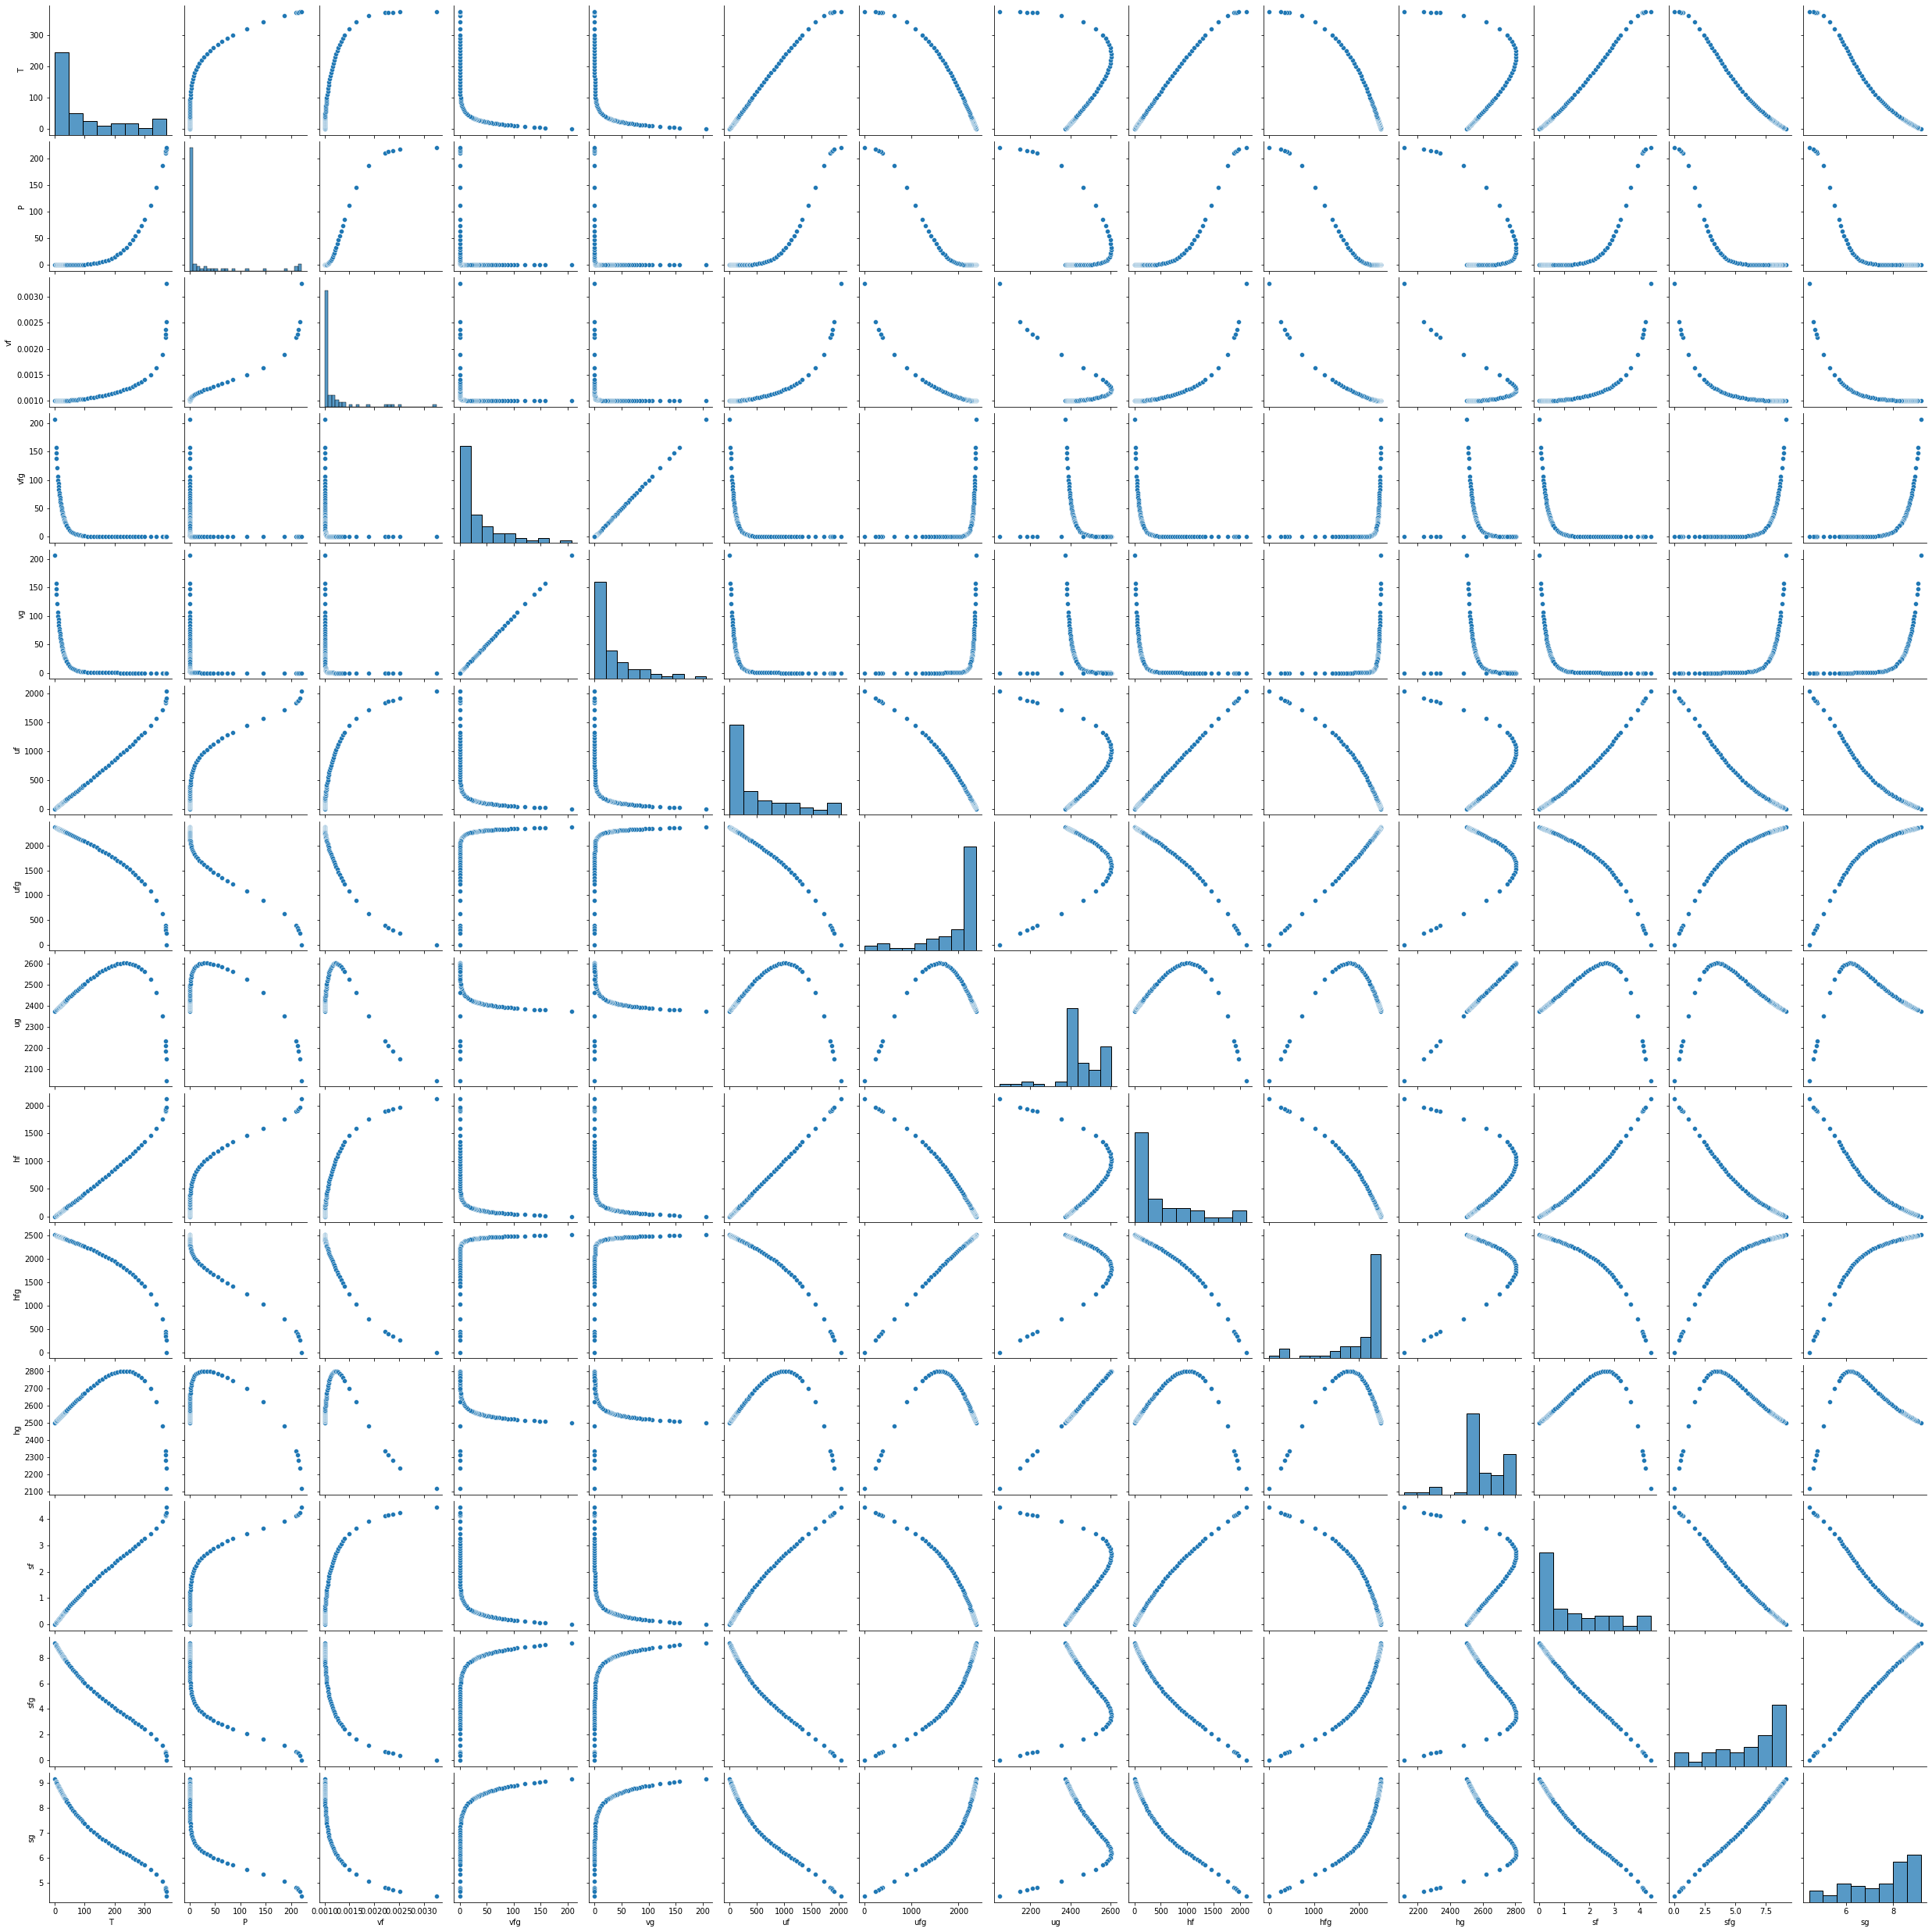

In [4]:
sns.pairplot(df)

In [8]:
X=df.iloc[:,0:2]
y=df.iloc[:,2].values

In [10]:
y

array([0.00100023, 0.00100012, 0.00100012, 0.00100014, 0.00100022,
       0.00100036, 0.00100044, 0.00100054, 0.00100066, 0.00100078,
       0.00100092, 0.00100107, 0.00100123, 0.0010014 , 0.00100159,
       0.00100178, 0.00100199, 0.00100221, 0.00100244, 0.00100268,
       0.00100293, 0.00100319, 0.00100346, 0.00100375, 0.00100404,
       0.00100434, 0.00100465, 0.00100497, 0.00100529, 0.00100563,
       0.00100598, 0.00100633, 0.00100707, 0.00100784, 0.00100989,
       0.00101214, 0.00101457, 0.00101716, 0.00101992, 0.00102284,
       0.00102591, 0.00102913, 0.0010325 , 0.00103602, 0.00103969,
       0.00104351, 0.00105161, 0.00106033, 0.0010697 , 0.00107974,
       0.00109049, 0.00110198, 0.00111426, 0.0011274 , 0.00114144,
       0.00115649, 0.00117263, 0.00119001, 0.00120876, 0.0012291 ,
       0.00125125, 0.00127553, 0.00130231, 0.00133211, 0.00136557,
       0.00140358, 0.00149881, 0.00163795, 0.00189315, 0.00221704,
       0.00228502, 0.00237648, 0.00251953, 0.00325591])

In [53]:
from sklearn.preprocessing import  MinMaxScaler
sc= MinMaxScaler()
X= sc.fit_transform(X)
y= y.reshape(-1,1)
y=sc.fit_transform(y)

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X= sc.fit_transform(X)
y= y.reshape(-1,1)
y=sc.fit_transform(y)

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [55]:
from keras import Sequential
from keras.layers import Dense

In [56]:
def build_regressor():
    regressor = Sequential()
    regressor.add(Dense(units=13, input_dim=2))
    regressor.add(Dense(units=30))
    regressor.add(Dense(units=1))
    regressor.compile(optimizer='adam', loss='mean_squared_error',  metrics=['mae','accuracy'])
    return regressor

In [57]:
from keras.wrappers.scikit_learn import KerasRegressor
regressor = KerasRegressor(build_fn=build_regressor, batch_size=3,epochs=100)

In [58]:
results=regressor.fit(X_train,y_train)

Epoch 1/100
17/17 [==============================] - 3s 1ms/step - loss: 0.2299 - mae: 0.2390 - accuracy: 0.0196 
Epoch 2/100
17/17 [==============================] - 0s 1ms/step - loss: 0.0888 - mae: 0.1894 - accuracy: 0.0196
Epoch 3/100
17/17 [==============================] - 0s 1ms/step - loss: 0.0455 - mae: 0.1645 - accuracy: 0.0196
Epoch 4/100
17/17 [==============================] - 0s 1ms/step - loss: 0.0275 - mae: 0.1239 - accuracy: 0.0196
Epoch 5/100
17/17 [==============================] - 0s 2ms/step - loss: 0.0171 - mae: 0.0844 - accuracy: 0.0196
Epoch 6/100
17/17 [==============================] - 0s 1ms/step - loss: 0.0116 - mae: 0.0501 - accuracy: 0.0196
Epoch 7/100
17/17 [==============================] - 0s 1ms/step - loss: 0.0087 - mae: 0.0445 - accuracy: 0.0196
Epoch 8/100
17/17 [==============================] - 0s 2ms/step - loss: 0.0081 - mae: 0.0485 - accuracy: 0.0196
Epoch 9/100
17/17 [==============================] - 0s 1ms/step - loss: 0.0074 - mae: 0.0481 -

17/17 [==============================] - 0s 1ms/step - loss: 0.0048 - mae: 0.0322 - accuracy: 0.0392    
Epoch 72/100
17/17 [==============================] - 0s 1ms/step - loss: 0.0050 - mae: 0.0358 - accuracy: 0.0392    
Epoch 73/100
17/17 [==============================] - 0s 1ms/step - loss: 0.0044 - mae: 0.0324 - accuracy: 0.0392    
Epoch 74/100
17/17 [==============================] - 0s 1ms/step - loss: 0.0042 - mae: 0.0271 - accuracy: 0.0392    
Epoch 75/100
17/17 [==============================] - 0s 2ms/step - loss: 0.0046 - mae: 0.0285 - accuracy: 0.0392
Epoch 76/100
17/17 [==============================] - 0s 1ms/step - loss: 0.0042 - mae: 0.0287 - accuracy: 0.0392    
Epoch 77/100
17/17 [==============================] - 0s 2ms/step - loss: 0.0051 - mae: 0.0317 - accuracy: 0.0392    
Epoch 78/100
17/17 [==============================] - 0s 1ms/step - loss: 0.0047 - mae: 0.0308 - accuracy: 0.0392    
Epoch 79/100
17/17 [==============================] - 0s 1ms/step - loss:

In [59]:
y_pred= regressor.predict(X_test)

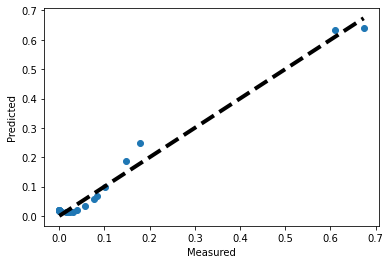

In [60]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()